**Author:** @curbsideprophet  
**Date written:** 2022-01-03  
**Last updated:** 2022-05-02  
**Objective:** performance analytics visualization of Ergodex liquidity pool investments

**Example CSV header requirements:**  
date, lp\_pair1, lp\_pair2  
2021-11-17, 0.97906, 8.41  
2021-11-27, 1.07014, 7.54  
2021-11-28, 1.03666, 7.80

## Load modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from coingecko_fetch import *

## Onboard data

In [7]:
ergodex_data_raw = "../../../../Desktop/ergo_data/ergodex/data-erg_sigusd.csv"
edex_title = "ErgoDEX: ERG/SigUSD Liquidity Pair"

#ergodex_data_raw = "../../../../Desktop/ergo_data/ergodex/data-erg_sigrsv.csv"
#edex_title = "ErgoDEX: ERG/SigRSV Liquidity Pair"

ergodex_data = pd.read_csv(ergodex_data_raw)
ergodex_data['date'] = pd.to_datetime(ergodex_data['date'])

## Grab daily price data

In [3]:
ergo = coingecko_fetch("ergo")
ergo.rename(columns = {'timestamp': 'date'}, inplace = True)

## Compute and join data frames

In [8]:
def ergodex_analytics(df):
    
    df_final = df.merge(ergo, how='left', on='date')

    ilp1 = df_final.lp_pair1[0]
    ilp2 = df_final.lp_pair2[0]
    ilp_ratio = ilp1 / ilp2
    ilp_price = df_final.price[0]

    df_final['ratio'] = df_final.lp_pair1 / df_final.lp_pair2
    df_final['lp_value1'] = df_final.lp_pair1 * df_final.price
    df_final['lp_value2'] = df_final.lp_pair2 * df_final.price * df_final.ratio
    df_final['lp_investment'] = df_final.lp_value1 + df_final.lp_value2
    df_final['hodl_instead'] = (ilp1 * df_final.price) + (ilp2 * df_final.price * ilp_ratio)
    df_final['erg_diff'] = 100 * (df_final.price / ilp_price - 1)
    df_final['lp_vs_hodl'] = 100 * (df_final.lp_investment / df_final.hodl_instead - 1)
    
    return(df_final)

ergodex = ergodex_analytics(ergodex_data)
ergodex_ax1 = ergodex[1:]

## Plot data

<Figure size 600x400 with 0 Axes>

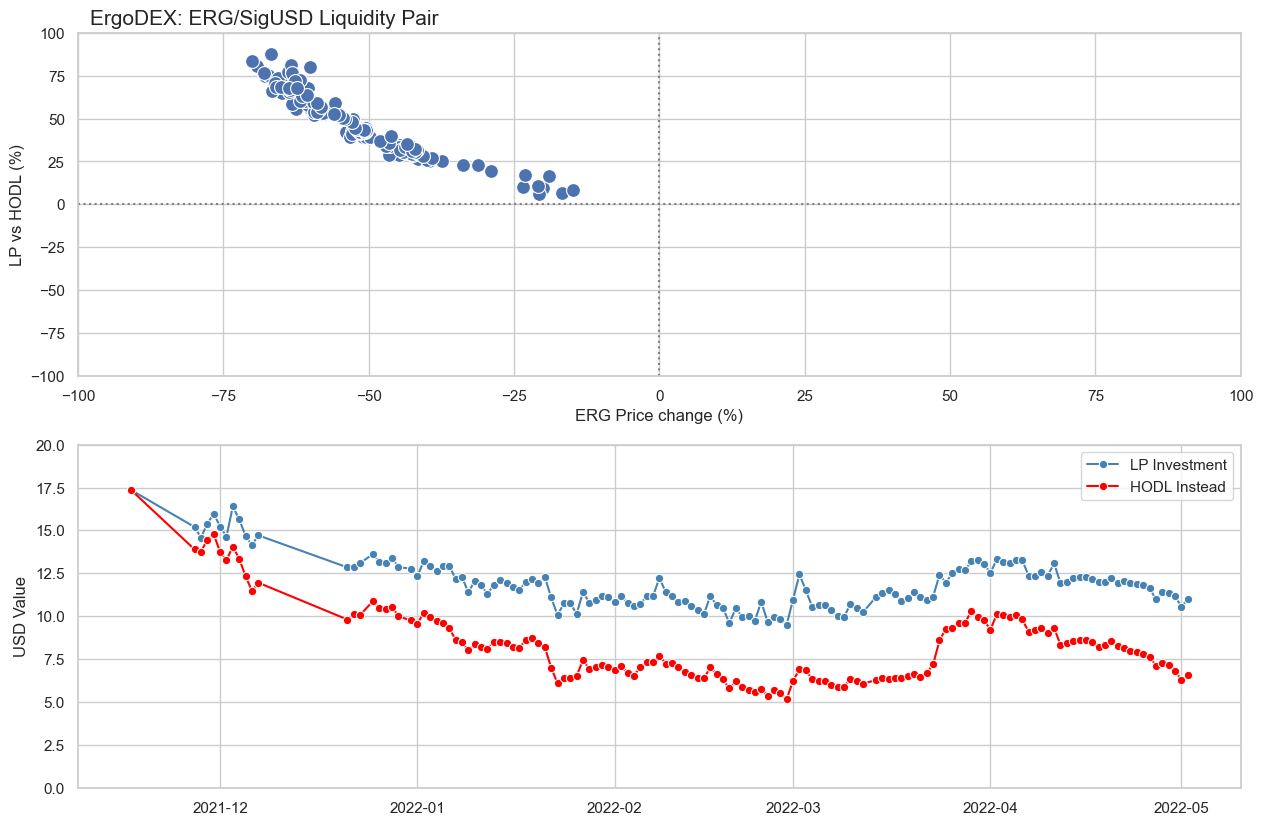

In [11]:
sns.set(style="whitegrid")

plt.clf()

plt.rcParams["figure.dpi"] = 100
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(2, 1, 1) 
ax1 = sns.scatterplot(data=ergodex_ax1, x="erg_diff", y="lp_vs_hodl", s=100)
ax1.axhline(0, color='grey', linestyle=':')
ax1.axvline(0, color='grey', linestyle=':')
ax1.set_title(edex_title, x=0.01, y=1.00, fontsize=15, horizontalalignment='left')
ax1.set_xlabel("ERG Price change (%)")
ax1.set_ylabel("LP vs HODL (%)")
ax1.set_xlim(-100, 100)
ax1.set_ylim(-100, 100)

ax2 = fig.add_subplot(2, 1, 2)
ax2 = sns.lineplot(data=ergodex, x="date", y="lp_investment", marker="o", color='steelblue', label="LP Investment")
ax2 = sns.lineplot(data=ergodex, x="date", y="hodl_instead", marker="o", color='red', label="HODL Instead")
ax2.set_xlabel("")
ax2.set_ylabel("USD Value")
ax2.set_ylim(0, 20)

plt.show()
#plt.savefig('../../img/ergodex/ergodex-ergsigusd.png')
#plt.savefig('../../img/ergodex/ergodex-ergsigrsv.png')

In [12]:
ergodex_ax1

,date,lp_pair1,lp_pair2,id,symbol,price,market_cap,ratio,lp_value1,lp_value2,lp_investment,hodl_instead,erg_diff,lp_vs_hodl
1,2021-11-27,1.071042,7.54,ergo,ERG,7.093653,3.310171e+08,0.142048,7.597599,7.597599,15.195198,13.890223,-19.984654,9.394920
2,2021-11-28,1.036663,7.80,ergo,ERG,7.032118,3.284091e+08,0.132905,7.289935,7.289935,14.579870,13.769731,-20.678755,5.883476
3,2021-11-29,1.042438,7.76,ergo,ERG,7.384660,3.458291e+08,0.134335,7.698048,7.698048,15.396095,14.460051,-16.702132,6.473315
4,2021-11-30,1.058641,7.64,ergo,ERG,7.546806,3.539963e+08,0.138566,7.989356,7.989356,15.978712,14.777551,-14.873155,8.128283
5,2021-12-01,1.084491,7.46,ergo,ERG,7.019067,3.297152e+08,0.145374,7.612115,7.612115,15.224230,13.744175,-20.825971,10.768602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,2022-04-28,1.536967,5.57,ergo,ERG,3.702796,1.994886e+08,0.275937,5.691076,5.691076,11.382152,7.250520,-58.233007,56.983945
138,2022-04-29,1.557266,5.50,ergo,ERG,3.647095,1.968120e+08,0.283139,5.679497,5.679497,11.358994,7.141451,-58.861305,59.057243
139,2022-04-30,1.601201,5.35,ergo,ERG,3.488769,1.855513e+08,0.299290,5.586221,5.586221,11.172443,6.831429,-60.647202,63.544749
140,2022-05-01,1.643090,5.21,ergo,ERG,3.208981,1.741059e+08,0.315372,5.272644,5.272644,10.545289,6.283570,-63.803170,67.823209
